In [1]:
!pip install pingouin
!pip install regex
!pip install altair
import numpy as np
import pandas as pd
import pingouin as pg
import regex as re
import altair as alt
from altair import *

In [2]:
!pip install nba_api
!pip install sportsreference

In [3]:
import requests

In [4]:
from nba_api.stats.static import players
player_dict = players.get_players()

# Use ternary operator or write function 
# Names are case sensitive
bron = [player for player in player_dict if player['full_name'] == 'LeBron James'][0]
bron_id = bron['id']

# find team Ids
from nba_api.stats.static import teams 
teams = teams.get_teams()
GSW = [x for x in teams if x['full_name'] == 'Golden State Warriors'][0]
GSW_id = GSW['id']

In [5]:
# First we import the endpoint
# We will be using pandas dataframes to manipulate the data
from nba_api.stats.endpoints import playergamelog
import pandas as pd 

#Call the API endpoint passing in lebron's ID & which season 
gamelog_bron = playergamelog.PlayerGameLog(player_id='2544', season = '2018')

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
df_bron_games_2018 = gamelog_bron.get_data_frames()

# If you want all seasons, you must import the SeasonAll parameter 
from nba_api.stats.library.parameters import SeasonAll

gamelog_bron_all = playergamelog.PlayerGameLog(player_id='2544', season = SeasonAll.all)

df_bron_games_all = gamelog_bron_all.get_data_frames()

In [6]:
from nba_api.stats.endpoints import leaguegamefinder

#this time we convert it to a dataframe in the same line of code
GSW_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=GSW_id).get_data_frames()[0]

In [7]:
from nba_api.stats.endpoints import *
from nba_api.stats.library.parameters import *
wingspan13=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2013')
wingspan13_df = wingspan13.get_data_frames()
wingspan13 = pd.DataFrame(wingspan13_df[0])
wingspan13
wingspan14=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2014')
wingspan14_df = wingspan14.get_data_frames()
wingspan14 = pd.DataFrame(wingspan14_df[0])
wingspan14
wingspan15=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2015')
wingspan15_df = wingspan15.get_data_frames()
wingspan15 = pd.DataFrame(wingspan15_df[0])
wingspan15
wingspan16=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2016')
wingspan16_df = wingspan16.get_data_frames()
wingspan16 = pd.DataFrame(wingspan16_df[0])
wingspan16
wingspan17=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2017')
wingspan17_df = wingspan17.get_data_frames()
wingspan17 = pd.DataFrame(wingspan17_df[0])
#wingspan17

In [8]:
#shotchart = shotchartdetail.ShotChartDetail(context_measure_simple = 'TS_PCT',league_id='00',last_n_games=100,month='Jan',opponent_team_id='DEN',period=1,player_id='2544',season_type_all_star='Regular Season',team_id='LAL')
LAL = [x for x in teams if x['full_name'] == 'Los Angeles Lakers'][0]
LAL_id = LAL['id']
#teams

In [9]:
pd.set_option("display.max_columns", 999)
shotchart = shotchartdetail.ShotChartDetail(team_id = '0',player_id='0',date_from_nullable ='01/01/2019', date_to_nullable = '12/31/2019')
leagueshotchart = shotchart.get_data_frames()
leagueshotchartdf = pd.DataFrame(leagueshotchart[0])
leagueshotchartdf

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800549,7,201586,Serge Ibaka,1610612761,Toronto Raptors,1,11,36,Made Shot,Turnaround Hook Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,1,20,1,1,20190101,TOR,UTA
1,Shot Chart Detail,0021800549,8,1628378,Donovan Mitchell,1610612762,Utah Jazz,1,11,23,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,6,2,1,1,20190101,TOR,UTA
2,Shot Chart Detail,0021800549,11,203497,Rudy Gobert,1610612762,Utah Jazz,1,10,50,Made Shot,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,2,1,1,20190101,TOR,UTA
3,Shot Chart Detail,0021800549,13,201980,Danny Green,1610612761,Toronto Raptors,1,10,34,Made Shot,Turnaround Bank Hook Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,12,1,1,1,20190101,TOR,UTA
4,Shot Chart Detail,0021800549,21,1627783,Pascal Siakam,1610612761,Toronto Raptors,1,10,5,Made Shot,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,2,3,1,1,20190101,TOR,UTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97106,Shot Chart Detail,0021900503,655,1629029,Luka Doncic,1610612742,Dallas Mavericks,4,2,57,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27,-10,278,1,1,20191231,OKC,DAL
97107,Shot Chart Detail,0021900503,667,101108,Chris Paul,1610612760,Oklahoma City Thunder,4,1,59,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-235,-3,1,1,20191231,OKC,DAL
97108,Shot Chart Detail,0021900503,682,1629029,Luka Doncic,1610612742,Dallas Mavericks,4,1,22,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,-2,48,1,1,20191231,OKC,DAL
97109,Shot Chart Detail,0021900503,683,101108,Chris Paul,1610612760,Oklahoma City Thunder,4,1,14,Made Shot,Driving Floating Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,10,36,1,1,20191231,OKC,DAL


In [10]:
shotdefense1819 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2018-19')
shotdefenseget1819 = shotdefense1819.get_data_frames()
shotdefense1819df = pd.DataFrame(shotdefenseget1819[0])
shotdefense1819df
shotdefense1718 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2017-18')
shotdefenseget1718 = shotdefense1718.get_data_frames()
shotdefense1718df = pd.DataFrame(shotdefenseget1718[0])
shotdefense1718df
shotdefense1617 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2016-17')
shotdefenseget1617 = shotdefense1617.get_data_frames()
shotdefense1617df = pd.DataFrame(shotdefenseget1617[0])
shotdefense1617df
shotdefense1516 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2015-16')
shotdefenseget1516 = shotdefense1516.get_data_frames()
shotdefense1516df = pd.DataFrame(shotdefenseget1516[0])
shotdefense1516df
shotdefense1415 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2014-15')
shotdefenseget1415 = shotdefense1415.get_data_frames()
shotdefense1415df = pd.DataFrame(shotdefenseget1415[0])
shotdefense1415df

,CLOSE_DEF_PERSON_ID,GP,G,DEFENSE_CATEGORY,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS
0,708,47,47,Overall,1.000,134.0,285.0,0.470,0.465,0.006
1,977,35,35,Overall,1.000,150.0,311.0,0.482,0.444,0.038
2,1495,77,77,Overall,1.000,450.0,1010.0,0.446,0.471,-0.026
3,1713,62,62,Overall,1.000,127.0,304.0,0.418,0.435,-0.018
4,1717,77,77,Overall,1.000,418.0,867.0,0.482,0.460,0.023
...,...,...,...,...,...,...,...,...,...,...
2935,202077,3,1,Greater Than 15 Ft,0.333,0.0,1.0,0.000,0.385,-0.385
2936,203945,3,3,Greater Than 15 Ft,0.750,2.0,3.0,0.667,0.358,0.309
2937,200748,1,1,Greater Than 15 Ft,1.000,0.0,2.0,0.000,0.347,-0.347
2938,203961,1,0,Greater Than 15 Ft,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from nba_api.stats.static import players
players = players.get_players()
[x for x in players]
players[0]['full_name']
player_name = None
player_list = []
x=0

for player in players:
    player_name = players[x]['full_name']
    player_list.append(player_name)
    x+=1


#player_list


In [12]:
# playervplayer = playervsplayer.PlayerVsPlayer(vs_player_id='101108',player_id='2544')
# playervplayerget = playervplayer.get_data_frames()
# playervplayerdf = pd.DataFrame(playervplayerget[0])
# playervplayerdf

In [13]:
import json
#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
df_bron_games_2018 = gamelog_bron.get_data_frames()

# If you want all seasons, you must import the SeasonAll parameter 
from nba_api.stats.library.parameters import SeasonAll

gamelog_bron_all = playergamelog.PlayerGameLog(player_id='2544', season = SeasonAll.all)

bron_dict = gamelog_bron_all.get_dict() 
#print(df_bron_games_2018[0])
df = pd.DataFrame(df_bron_games_2018[0])
df

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,2544,0021801135,"MAR 29, 2019",LAL vs. CHA,W,32,11,19,0.579,4,7,0.571,1,2,0.500,0,3,3,9,0,0,6,1,27,14,1
1,22018,2544,0021801116,"MAR 26, 2019",LAL vs. WAS,W,34,11,20,0.550,1,6,0.167,0,2,0.000,0,7,7,14,1,0,3,1,23,3,1
2,22018,2544,0021801102,"MAR 24, 2019",LAL vs. SAC,W,35,9,22,0.409,3,6,0.500,8,9,0.889,2,9,11,11,2,1,4,1,29,5,1
3,22018,2544,0021801086,"MAR 22, 2019",LAL vs. BKN,L,37,8,25,0.320,1,7,0.143,8,12,0.667,3,6,9,14,1,1,8,3,25,-2,1
4,22018,2544,0021801042,"MAR 17, 2019",LAL @ NYK,L,35,11,26,0.423,0,6,0.000,11,13,0.846,2,4,6,8,0,1,2,2,33,9,2
5,22018,2544,0021801023,"MAR 14, 2019",LAL @ TOR,L,32,12,23,0.522,1,5,0.200,4,7,0.571,0,4,4,6,1,0,4,2,29,0,1
6,22018,2544,0021801009,"MAR 12, 2019",LAL @ CHI,W,33,15,23,0.652,2,4,0.500,4,5,0.800,1,9,10,4,2,0,5,2,36,9,1
7,22018,2544,0021800989,"MAR 09, 2019",LAL vs. BOS,L,28,13,23,0.565,1,5,0.200,3,7,0.429,2,8,10,12,0,0,3,0,30,11,1
8,22018,2544,0021800974,"MAR 06, 2019",LAL vs. DEN,L,31,13,22,0.591,2,7,0.286,3,8,0.375,0,7,7,7,1,1,4,4,31,-8,1
9,22018,2544,0021800958,"MAR 04, 2019",LAL vs. LAC,L,42,9,18,0.500,1,6,0.167,8,12,0.667,0,8,8,6,1,1,2,3,27,-11,1


In [14]:
draftclass13 = pd.merge(left=shotdefense1415df,right=wingspan13,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass13 = draftclass13.dropna(subset=['PLAYER_NAME'])
draftclass14 = pd.merge(left=shotdefense1516df,right=wingspan14,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass14 = draftclass14.dropna(subset=['PLAYER_NAME'])
draftclass15 = pd.merge(left=shotdefense1617df,right=wingspan15,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass15 = draftclass15.dropna(subset=['PLAYER_NAME'])
draftclass16 = pd.merge(left=shotdefense1718df,right=wingspan16,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass16 = draftclass16.dropna(subset=['PLAYER_NAME'])
draftclass17 = pd.merge(left=shotdefense1819df,right=wingspan17,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass17 = draftclass17.dropna(subset=['PLAYER_NAME'])
allclasses = pd.concat([draftclass13,draftclass14,draftclass15,draftclass16,draftclass17])
allclasses.head()

,CLOSE_DEF_PERSON_ID,GP,G,DEFENSE_CATEGORY,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
365,203318,5,5,Overall,1.0,7.0,11.0,0.636,0.411,0.226,None,203318.0,Glen,Rice,Glen Rice,SF-SG,76.50,6' 4.5'',77.75,6' 5.75'',210.8,81.25,6' 9.25'',101.5,8' 5.5'',8.45,8.50,9.00
367,203457,75,75,Overall,1.0,446.0,951.0,0.469,0.468,0.001,None,203457.0,Nerlens,Noel,Nerlens Noel,C,82.00,6' 10'',83.75,6' 11.75'',206.4,87.75,7' 3.75'',110.0,9' 2'',4.15,9.50,10.00
368,203458,68,68,Overall,1.0,338.0,734.0,0.460,0.470,-0.009,None,203458.0,Alex,Len,Alex Len,C,NaN,None,NaN,None,None,87.50,7' 3.5'',NaN,None,6.40,9.00,10.75
369,203459,47,47,Overall,1.0,85.0,210.0,0.405,0.425,-0.020,None,203459.0,Allen,Crabbe,Allen Crabbe,SG,77.25,6' 5.25'',78.25,6' 6.25'',197.4,83.25,6' 11.25'',103.5,8' 7.5'',4.65,8.25,8.50
370,203460,67,67,Overall,1.0,185.0,462.0,0.400,0.444,-0.043,None,203460.0,Andre,Roberson,Andre Roberson,PF-SF,78.25,6' 6.25'',79.00,6' 7'',205.8,83.00,6' 11'',104.5,8' 8.5'',7.05,8.75,9.50


In [15]:
##We suspect that the relationship between Standing Reach and Defensive RPM

(-0.7889999999999999, 0.8999999999999999)

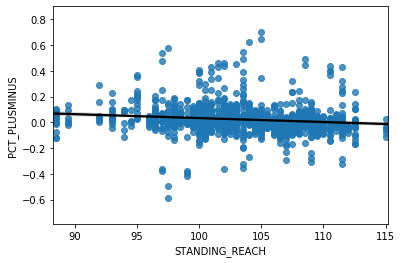

In [16]:
##Let's create a scatter plot to assuage the relationship between PCT_PLUSMINUS and STANDING_REACH
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

#We will also fit a regression line to the data, to aid our understanding visually
ax = sns.regplot(data=allclasses,x='STANDING_REACH',y='PCT_PLUSMINUS', line_kws={'color':'black'})
ax.set_xlim(allclasses['STANDING_REACH'].min() - 0.2, allclasses['STANDING_REACH'].max() + 0.2)
ax.set_ylim(allclasses['PCT_PLUSMINUS'].min() - 0.2, allclasses['PCT_PLUSMINUS'].max() + 0.2)





In [52]:
Base = alt.Chart(allclasses).mark_circle(size=30).encode(
x=alt.X(
  'STANDING_REACH',
  axis=alt.Axis(),
  scale=Scale(domain=[85, 120]),
  title=None
  ),
  y=alt.Y(
  'PCT_PLUSMINUS',
  axis=alt.Axis(),
  scale=Scale(domain=[-0.7, 0.7]),
  title='Standing Reach X Effect on FG Percentage'
  ),
  color = alt.Color('POSITION',scale = alt.Scale(scheme='bluegreen'))
 )

Base + Base.transform_regression('STANDING_REACH','PCT_PLUSMINUS').mark_line(color='black')

alt.LayerChart(...)

In [18]:

#As expected, the relationship between both variables is negative(lower plus minus==better defense), though it appears to be weaker than we anticipated. Let's calculate the pearson correlation coefficient and R2 to validate.
#Note: filter out excess noise from visualization to clean up visualization
pg.corr(x=allclasses['STANDING_REACH'], y=allclasses['PCT_PLUSMINUS'])





,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1253,-0.13577,"[-0.19, -0.08]",0.018433,0.016863,0.000001,3936.842,0.99796


In [19]:
from sportsreference.ncaab.boxscore import Boxscore
game_data = Boxscore('2018-04-02-21-villanova')
print(game_data.home_points)  # Prints 79
print(game_data.away_points)  # Prints 62
df = game_data.dataframe  # Returns a Pandas DataFrame of game metrics


79
62


In [20]:
from sportsreference.ncaab.player import AbstractPlayer
import pprint

carsenedwards = AbstractPlayer(player_id = 'carsen-edwards-1', player_name='carsen-edwards-1',player_data='all_players_per_game')
carsenedwards

In [24]:
#Let's get the names of all of the nba players
allplayersnba = pd.read_csv('All_NBA_Players.csv')
allplayersnba['NAME'] = allplayersnba['NAME'].str.replace(',', '')
allplayersnba = allplayersnba.dropna(subset=['COLLEGE'])
nba_ncaaplayers = allplayersnba['NAME'].to_list()
#nba_ncaaplayers



In [25]:
from sportsreference.ncaab.teams import Teams
from sportsreference.ncaab.roster import Roster
from sportsreference.ncaab.roster import Player
from sportsreference.nba.teams import Teams as NBA_TEAMS
from sportsreference.nba.roster import Roster as NBA_ROSTER
from sportsreference.nba.roster import Player as NBA_PLAYER
import random


ncaa_columns = ['assist_percentage', 'assists', 'block_percentage', 'blocks',
       'box_plus_minus', 'conference', 'defensive_box_plus_minus',
       'defensive_rebound_percentage', 'defensive_rebounds',
       'defensive_win_shares', 'effective_field_goal_percentage',
       'field_goal_attempts', 'field_goal_percentage', 'field_goals',
       'free_throw_attempt_rate', 'free_throw_attempts',
       'free_throw_percentage', 'free_throws', 'games_played', 'games_started',
       'height', 'minutes_played', 'offensive_box_plus_minus',
       'offensive_rebound_percentage', 'offensive_rebounds',
       'offensive_win_shares', 'personal_fouls', 'player_efficiency_rating',
       'player_id', 'points', 'points_produced', 'position',
       'steal_percentage', 'steals', 'team_abbreviation',
       'three_point_attempt_rate', 'three_point_attempts',
       'three_point_percentage', 'three_pointers', 'total_rebound_percentage',
       'total_rebounds', 'true_shooting_percentage', 'turnover_percentage',
       'turnovers', 'two_point_attempts', 'two_point_percentage',
       'two_pointers', 'usage_percentage', 'weight', 'win_shares',
       'win_shares_per_40_minutes']

nba_columns = ['and_ones', 'assist_percentage', 'assists', 'block_percentage', 'blocking_fouls', 'blocks', 'box_plus_minus', 'center_percentage', 'defensive_box_plus_minus', 'defensive_rebound_percentage', 'defensive_rebounds', 'defensive_win_shares', 'dunks', 'effective_field_goal_percentage', 'field_goal_attempts', 'field_goal_perc_sixteen_foot_plus_two_pointers', 'field_goal_perc_ten_to_sixteen_feet', 'field_goal_perc_three_to_ten_feet', 'field_goal_perc_zero_to_three_feet', 'field_goal_percentage', 'field_goals', 'free_throw_attempt_rate', 'free_throw_attempts', 'free_throw_percentage', 'free_throws', 'games_played', 'games_started', 'half_court_heaves', 'half_court_heaves_made', 'height', 'lost_ball_turnovers', 'minutes_played', 'nationality', 'net_plus_minus', 'offensive_box_plus_minus', 'offensive_fouls', 'offensive_rebound_percentage', 'offensive_rebounds', 'offensive_win_shares', 'on_court_plus_minus', 'other_turnovers', 'passing_turnovers', 'percentage_field_goals_as_dunks', 'percentage_of_three_pointers_from_corner', 'percentage_shots_three_pointers', 'percentage_shots_two_pointers', 'percentage_sixteen_foot_plus_two_pointers', 'percentage_ten_to_sixteen_footers', 'percentage_three_to_ten_footers', 'percentage_zero_to_three_footers', 'personal_fouls', 'player_efficiency_rating', 'player_id', 'point_guard_percentage', 'points', 'points_generated_by_assists', 'position', 'power_forward_percentage', 'salary', 'shooting_distance', 'shooting_fouls', 'shooting_fouls_drawn', 'shooting_guard_percentage', 'shots_blocked', 'small_forward_percentage', 'steal_percentage', 'steals', 'take_fouls', 'team_abbreviation', 'three_point_attempt_rate', 'three_point_attempts', 'three_point_percentage', 'three_point_shot_percentage_from_corner', 'three_pointers', 'three_pointers_assisted_percentage', 'total_rebound_percentage', 'total_rebounds', 'true_shooting_percentage', 'turnover_percentage', 'turnovers', 'two_point_attempts', 'two_point_percentage', 'two_pointers', 'two_pointers_assisted_percentage', 'usage_percentage', 'value_over_replacement_player', 'weight', 'win_shares', 'win_shares_per_48_minutes']



team_name = "DUKE"

my_string = '-1'

player_list = []

roster = Roster(team_name)
for player in roster.players:
    player_list.append(player.name)
    
player_list = [each_string.lower() for each_string in player_list]

player_list_hyphens = [p.strip().replace(" ", "-") for p in player_list]

player_list_complete = [s + my_string for s in player_list_hyphens]

#player_list_complete.remove('eric-hunter-jr.-1')

In [26]:
def playerformat_ncaa(player_lst):
    my_string = '-1'
    player_list = [each_string.lower() for each_string in player_lst]
    player_list_hyphens = [p.strip().replace(" ", "-") for p in player_list]
    player_list_complete = [s + my_string for s in player_list_hyphens]
    return player_list_complete

In [27]:
def ncaa_playerdf(player_lst):
    player_df = pd.DataFrame(columns=ncaa_columns)
    for player in player_lst:
        try:
            x = Player(player)
            y = x.dataframe
            player_df = player_df.append(y)
        except:
            next
    return player_df



In [28]:
# purdue = Roster('DUKE', '2017')
# for player in purdue.players:
    # Prints the name of all players who played for Purdue in the most
    # recent season.
    # print(player.name)

In [29]:
# teams = Teams()
# team_lst = []
# for team in teams:
#     team_lst.append(team.name)
    
# season_list = ['2008', '2009', '2010']    
# player_list = []
# def player_collection_ncaa(team_lst):
#     for team in team_lst:
#         for season in season_list:
#             try:
#                 roster = Roster(team,season)
#                 for player in roster.players:
#                     # Prints the name of all players who played for Purdue in the most
#                     # recent season.
#                     player_list.append(player.name)
#             except:
#                 next
#     return player_list

# sample_list = player_collection_ncaa(random.sample(team_lst,10))

In [30]:
ncaa_dataframe_final = ncaa_playerdf(playerformat_ncaa(nba_ncaaplayers))
ncaa_dataframe_final

,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
"(2012-13,)",5.4,20,11.2,65,8.1,big-east,4.2,21,113,1.9,0.571,175,0.571,100,0.400,70,0.443,31,32,32,7-0,749,4,15.3,90,1.6,52,23.2,steven-adams-1,231,228,Center,1.9,21,pittsburgh,0.000,0,None,0,18,203,0.555,14.4,35,175,0.571,100,17.7,250,3.5,0.185
"(Career,)",5.4,20,11.2,65,8.1,,4.2,21,113,1.9,0.571,175,0.571,100,0.400,70,0.443,31,32,32,7-0,749,4,15.3,90,1.6,52,23.2,steven-adams-1,231,228,Center,1.9,21,pittsburgh,0.000,0,None,0,18,203,0.555,14.4,35,175,0.571,100,17.7,250,3.5,0.185
"(2016-17,)",5.7,27,5,51,5.2,big-12,2.6,18.9,178,1.7,0.566,316,0.566,179,0.472,149,0.564,84,33,33,6-11,1061,2.6,10.9,100,1.5,68,20.3,jarrett-allen-1,442,428,Forward,1,19,texas,0.022,7,0,0,14.9,278,0.571,17.8,84,309,0.579,179,22.6,235,3.3,0.124
"(Career,)",5.7,27,5,51,5.2,,2.6,18.9,178,1.7,0.566,316,0.566,179,0.472,149,0.564,84,33,33,6-11,1061,2.6,10.9,100,1.5,68,20.3,jarrett-allen-1,442,428,Forward,1,19,texas,0.022,7,0,0,14.9,278,0.571,17.8,84,309,0.579,179,22.6,235,3.3,0.124
"(2017-18,)",10.2,57,6.1,66,11,pac-12,2.4,28.2,287,2.1,0.625,451,0.612,276,0.424,191,0.733,140,35,35,7-1,1172,8.6,13.5,118,5.5,81,32.6,deandre-ayton-1,704,666,Forward,1,20,arizona,0.078,35,0.343,12,21.4,405,0.650,11.3,69,416,0.635,264,26.6,250,7.6,0.259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(2017-18,)",18.1,100,0.6,7,3.9,colonial,-1.5,9.5,93,0.5,0.531,588,0.449,264,0.279,164,0.799,131,31,30,6-2,1171,5.5,1,10,4.0,62,22.8,justin-wright-foreman-1,755,687,Guard,1.2,25,hofstra,0.446,262,0.366,96,5.1,103,0.567,9.4,69,326,0.515,168,30.9,190,4.5,0.153
"(2018-19,)",17.4,102,0.6,7,6,colonial,-1.9,11.5,129,1.0,0.596,646,0.511,330,0.319,206,0.864,178,35,35,6-2,1321,7.9,1.2,12,6.3,67,28.9,justin-wright-foreman-1,948,844,Guard,1.3,30,hofstra,0.401,259,0.425,110,6.6,141,0.637,10.9,91,387,0.568,220,33,190,7.4,0.223
"(Career,)",16.3,258,0.6,19,4.9,,-1.5,10.8,323,2.0,0.565,1694,0.483,819,0.300,508,0.811,412,125,82,6-2,3507,6.4,1.4,44,13.8,201,25.4,justin-wright-foreman-1,2327,2068,Guard,1.4,83,hofstra,0.424,718,0.386,277,6.1,367,0.601,9.9,212,976,0.555,542,30.9,190,15.8,0.181
"(2017-18,)",48.6,279,0.7,8,11.1,big-12,1.3,10,111,1.1,0.518,618,0.422,261,0.443,274,0.861,236,32,32,6-2,1133,9.7,1.3,14,4.6,57,28.3,trae-young-1,876,935,Guard,2.5,54,oklahoma,0.531,328,0.36,118,5.8,125,0.585,18.2,167,290,0.493,143,37.1,180,5.7,0.201


In [32]:
def reformatname_year_ncaa(sampledf):
    sampledf['PLAYER_NAME'] = sampledf.player_id.str.replace("-"," ")
    sampledf['PLAYER_NAME'] = sampledf['PLAYER_NAME'].apply(lambda x: x.title()).str.replace(" 1","")
    sampledf = sampledf.reset_index().rename(columns={'index':'Year'})
    sampledf['Year'] = sampledf['Year'].astype(str)
    sampledf['Year'] = sampledf['Year'].str.replace('(', '')
    sampledf['Year'] = sampledf['Year'].str.replace(')', '')
    sampledf['Year'] = sampledf['Year'].str.replace("'", "")
    sampledf['Year'] = sampledf['Year'].str.replace(',', '')
    career = sampledf['Year']=='Career'
    sampledf = sampledf[career]
    

    return sampledf
ncaa_dataframe_final = reformatname_year_ncaa(ncaa_dataframe_final)
ncaa_dataframe_final

,Year,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,PLAYER_NAME
1,Career,5.4,20,11.2,65,8.1,,4.2,21,113,1.9,0.571,175,0.571,100,0.400,70,0.443,31,32,32,7-0,749,4,15.3,90,1.6,52,23.2,steven-adams-1,231,228,Center,1.9,21,pittsburgh,0.000,0,None,0,18,203,0.555,14.4,35,175,0.571,100,17.7,250,3.5,0.185,Steven Adams
3,Career,5.7,27,5,51,5.2,,2.6,18.9,178,1.7,0.566,316,0.566,179,0.472,149,0.564,84,33,33,6-11,1061,2.6,10.9,100,1.5,68,20.3,jarrett-allen-1,442,428,Forward,1,19,texas,0.022,7,0,0,14.9,278,0.571,17.8,84,309,0.579,179,22.6,235,3.3,0.124,Jarrett Allen
5,Career,10.2,57,6.1,66,11,,2.4,28.2,287,2.1,0.625,451,0.612,276,0.424,191,0.733,140,35,35,7-1,1172,8.6,13.5,118,5.5,81,32.6,deandre-ayton-1,704,666,Forward,1,20,arizona,0.078,35,0.343,12,21.4,405,0.650,11.3,69,416,0.635,264,26.6,250,7.6,0.259,Deandre Ayton
10,Career,1.6,37,2.2,93,None,,None,None,445,7.2,0.546,722,0.546,394,0.546,394,0.698,275,122,86,6-10,2679,None,None,208,7.1,290,None,aron-baynes-1,1064,None,Center,None,41,washington-state,0.004,3,NaN,1,15.6,653,0.585,14.3,152,719,0.547,393,23.2,250,14.3,0.213,Aron Baynes
12,Career,9.6,9,12.4,24,13,,3.9,29,67,0.8,0.610,132,0.561,74,0.280,37,0.757,28,9,9,7-2,268,9.1,8.7,19,1.1,15,37.5,bol-bol-1,189,154,Center,1.6,7,oregon,0.189,25,0.52,13,19.2,86,0.632,10.7,18,107,0.57,61,33.4,235,1.8,0.271,Bol Bol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,Career,28.6,148,4.9,49,12.4,,3.4,10.5,104,1.4,0.578,404,0.507,205,0.450,182,0.813,148,34,32,6-5,1116,9,3.5,35,4.5,72,27.3,derrick-white-1,615,603,Guard,2.2,42,colorado,0.356,144,0.396,57,7,139,0.627,14.2,81,260,0.569,148,25.3,193,5.9,0.211,Derrick White
1357,Career,29.4,496,0.4,13,5.6,,2,13.7,440,5.6,0.504,1236,0.464,574,0.292,361,0.806,291,100,100,6-3,3415,3.6,2.4,69,8.0,191,20.3,nigel-williams-goss-1,1536,1605,Guard,2.3,133,gonzaga,0.237,293,0.331,97,8.4,509,0.546,15.5,258,943,0.506,477,24.7,185,13.6,0.159,Nigel Williams Goss
1360,Career,30.8,352,3.5,77,13.9,,6.3,15.4,321,6.3,0.565,634,0.535,339,0.593,376,0.814,306,68,68,6-5,2367,7.6,4.3,76,9.5,110,28.1,delon-wright-1,1022,1114,Guard,4,155,utah,0.200,127,0.299,38,10.3,397,0.629,15.8,152,507,0.594,301,22.1,178,15.8,0.266,Delon Wright
1365,Career,16.3,258,0.6,19,4.9,,-1.5,10.8,323,2.0,0.565,1694,0.483,819,0.300,508,0.811,412,125,82,6-2,3507,6.4,1.4,44,13.8,201,25.4,justin-wright-foreman-1,2327,2068,Guard,1.4,83,hofstra,0.424,718,0.386,277,6.1,367,0.601,9.9,212,976,0.555,542,30.9,190,15.8,0.181,Justin Wright Foreman


In [33]:
def reformatname_year_nba(sampledf):
    sampledf = sampledf.reset_index().rename(columns={'index':'Year'})
    sampledf['Year'] = sampledf['Year'].astype(str)
    sampledf['Year'] = sampledf['Year'].str.replace('(', '')
    sampledf['Year'] = sampledf['Year'].str.replace(')', '')
    sampledf['Year'] = sampledf['Year'].str.replace("'", "")
    sampledf['Year'] = sampledf['Year'].str.replace(',', '')
    career = sampledf['Year']=='Career'
    sampledf = sampledf[career]
    

    return sampledf

In [34]:
# ncaasample

In [35]:
# teams = Teams()
# team_lst = []
# player_id_list = []
# for team in teams:
#     team_lst.append(team.abbreviation)
# season_list = [ '2015', '2016', '2017']    
# nbaplayers = player_collection(random.sample(team_lst, 10))
#nbaplayers = player_collection(team_lst)





In [36]:
# print(nbaplayers)


In [37]:
# def nba_playerdf(player_lst):
#     LASTNAME = re.compile(r"(?<= )([a-z]+)")
#     FIRSTNAME = re.compile(r"([^\s]+)")
#     FIRSTFIVE = re.compile(r"([a-z]{0,5})")
#     FIRSTFOUR = re.compile(r"([a-z]{0,4})")
#     FIRSTTHREE = re.compile(r"([a-z]{0,3})")
#     FIRSTTWO = re.compile(r"([a-z]{0,2})")
#     player_df = pd.DataFrame(columns=nba_columns)
#     for player in player_lst:
#         if len(re.search(LASTNAME,player.lower()).group(0))>=5:
#             player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
#         elif len(re.search(LASTNAME,player.lower()).group(0))==4:
#             player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
#             try:
#                 x = Player(player)
#                 y = x.dataframe
#                 player_df = player_df.append(y)
#             except:
#                 pass
#     return player_df



In [38]:
def nbaplayerdf_test5(player_lst):
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    player_df = pd.DataFrame(columns=nba_columns)
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))>=5:
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            try:
                x = NBA_PLAYER(player)
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
    return player_df

In [39]:
almost_final_nba4 = nbaplayerdf_test5(nba_ncaaplayers)

In [40]:
def nbaplayerdf_test4(player_lst):
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    player_df = pd.DataFrame(columns=nba_columns)
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))==4:
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            try:
                x = NBA_PLAYER(player)
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
    return player_df

In [41]:
almost_final_nba3 = nbaplayerdf_test4(nba_ncaaplayers)

In [42]:

def nbaplayerdf_test3(player_lst):
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    player_df = pd.DataFrame(columns=nba_columns)
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))==3:
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            try:
                x = NBA_PLAYER(player)
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
    return player_df

In [43]:
almost_final_nba2 = nbaplayerdf_test3(nba_ncaaplayers)

In [44]:

def nbaplayerdf_test2(player_lst):
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    player_df = pd.DataFrame(columns=nba_columns)
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))==2:
            player = re.search(FIRSTTWO,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            try:
                x = NBA_PLAYER(player)
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
    return player_df

In [45]:
almost_final_nba1 = nbaplayerdf_test2(nba_ncaaplayers)

In [46]:
nba_dataframe_final = pd.concat([almost_final_nba4,almost_final_nba3,almost_final_nba2, almost_final_nba1])
nba_dataframe_final = reformatname_year_nba(nba_dataframe_final)
nba_dataframe_final

,Year,and_ones,assist_percentage,assists,block_percentage,blocking_fouls,blocks,box_plus_minus,center_percentage,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,dunks,effective_field_goal_percentage,field_goal_attempts,field_goal_perc_sixteen_foot_plus_two_pointers,field_goal_perc_ten_to_sixteen_feet,field_goal_perc_three_to_ten_feet,field_goal_perc_zero_to_three_feet,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,half_court_heaves,half_court_heaves_made,height,lost_ball_turnovers,minutes_played,nationality,net_plus_minus,offensive_box_plus_minus,offensive_fouls,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,on_court_plus_minus,other_turnovers,passing_turnovers,percentage_field_goals_as_dunks,percentage_of_three_pointers_from_corner,percentage_shots_three_pointers,percentage_shots_two_pointers,percentage_sixteen_foot_plus_two_pointers,percentage_ten_to_sixteen_footers,percentage_three_to_ten_footers,percentage_zero_to_three_footers,personal_fouls,player_efficiency_rating,player_id,point_guard_percentage,points,points_generated_by_assists,position,power_forward_percentage,salary,shooting_distance,shooting_fouls,shooting_fouls_drawn,shooting_guard_percentage,shots_blocked,small_forward_percentage,steal_percentage,steals,take_fouls,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_point_shot_percentage_from_corner,three_pointers,three_pointers_assisted_percentage,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,two_pointers_assisted_percentage,usage_percentage,value_over_replacement_player,weight,win_shares,win_shares_per_48_minutes
7,Career,None,6.4,615,3.1,None,531,0.4,0,0.2,16.8,2206,19.4,None,0.589,3664,0.182,0.464,0.453,0.671,0.589,2157,0.429,1573,0.557,876,530,466,7,1,6-11,None,14207,New Zealand,None,0.2,None,14,1823,25.8,None,None,None,None,None,None,None,0.003,0.05,0.315,0.629,1384,17.2,adamsst01,0,5191,None,C,0,5.63246e+07,3.3,None,None,0,None,0,1.6,469,None,,0.003,10,0.1,None,1,None,15.4,4029,0.596,14.8,757,3654,0.59,2156,None,15.3,8.6,265,45.2,0.153
11,Career,None,7.6,269,4.4,None,300,1.2,0,0.9,22.7,1180,7.8,None,0.613,1430,0.273,0.306,0.378,0.725,0.609,871,0.486,695,0.694,482,222,175,2,1,6-11,None,5389,United States of America,None,0.3,None,10.8,551,12.3,None,None,None,None,None,None,None,0.008,0.025,0.22,0.7,493,19,allenja01,0,2235,None,C,0,3.74784e+06,3.6,None,None,0,None,0,1,111,None,,0.046,66,0.167,None,11,None,16.8,1731,0.644,13.1,262,1364,0.63,860,None,15.7,4.4,237,20,0.178
14,Career,None,9.6,197,3.1,None,125,0.2,0,-0.9,26.2,795,3.3,None,0.571,1438,0.359,0.402,0.497,0.73,0.57,819,0.193,278,0.748,208,109,102,0,0,6-11,None,3419,Bahamas,None,1.1,None,11.8,370,5.6,None,None,None,None,None,None,None,0.128,0.168,0.221,0.471,326,20.3,aytonde01,0,1849,None,C,0,8.16516e+06,6.7,None,None,0,None,0,1.2,87,None,,0.012,17,0.176,None,3,None,18.9,1165,0.593,11.7,206,1421,0.574,816,None,22.1,1.9,250,9,0.126
17,Career,None,7.3,81,8,None,150,-0.5,0,1.5,24.8,371,3.1,None,0.526,529,0.365,0.321,0.239,0.726,0.471,249,0.206,109,0.624,68,109,1,1,0,7-0,None,1644,United States of America,None,-2,None,10.5,164,1.1,None,None,None,None,None,None,None,0.098,0.053,0.134,0.38,218,16.3,bambamo01,0,624,None,C,0,4.86504e+06,12.4,None,None,0,None,0,1.1,36,None,,0.335,177,0.328,None,58,None,17.5,535,0.541,12.8,85,352,0.543,191,None,17.5,0.6,241,4.2,0.121
26,Career,None,7.6,374,2.6,None,232,-2.1,0,0.1,21.1,1405,10,None,0.514,2239,0.426,0.418,0.449,0.597,0.495,1109,0.273,611,0.8,489,469,137,0,0,6-10,None,7390,New Zealand,None,-2.2,None,10.7,718,9,None,None,None,None,None,None,None,0.087,0.117,0.235,0.446,1045,14.1,baynear01,0,2791,None,C,0,2.57886e+07,7.7,None,None,0,None,0,0.7,101,None,,0.115,257,0.327,None,84,None,15.8,2123,0.556,13.7,399,1982,0.517,102

In [47]:
#Now let's reformat the PLAYER_NAME column in the ncaa dataframe to match the player_id column in the nba dataframe
def reformat_PLAYERNAME_ncaa(player_lst):
    new_list = []
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))>=5:
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==4:
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==3:
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            new_list.append(player)
        else:
             player = re.search(FIRSTTWO,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
             new_list.append(player)
    return new_list
        

ncaa_dataframe_final = ncaa_dataframe_final.rename(columns={"PLAYER_NAME": "PLAYER_NAME_OLD"})
playernamelist = ncaa_dataframe_final['PLAYER_NAME_OLD'].to_list()
playernamelist = reformat_PLAYERNAME_ncaa(playernamelist)
ncaa_dataframe_final['PLAYER_NAME_NEW'] = playernamelist
ncaa_dataframe_final = ncaa_dataframe_final.drop(columns=['PLAYER_NAME_OLD'])
ncaa_dataframe_final = ncaa_dataframe_final.rename(columns={"PLAYER_NAME_NEW": "PLAYER_NAME"})


# #Now let's rename the player id column in the nba dataframe to PLAYER_NAME, just for consistency
nba_dataframe_final = nba_dataframe_final.rename(columns={"player_id": "PLAYER_NAME"})



In [82]:
#Merging NCAA & NBA files
ncaa_nba = pd.merge(left=ncaa_dataframe_final,right=nba_dataframe_final,how='left',left_on='PLAYER_NAME',right_on='PLAYER_NAME')

#Dropping rows where there is nan value in win_shares_per_40_minutes or win_shares_per_48_minutes
#19 rows are dropped
ncaa_nba = ncaa_nba.dropna(subset = ['win_shares_per_40_minutes','win_shares_per_48_minutes'])

#Converting column values to float type
ncaa_nba['win_shares_per_40_minutes'] = ncaa_nba['win_shares_per_40_minutes'].astype(float)
ncaa_nba['win_shares_per_48_minutes'] = ncaa_nba['win_shares_per_48_minutes'].astype(float)
ncaa_nba.dtypes

#Measuring correlation between win shares per 40 in the NCAA and win shares per 48 in the nba
pg.corr(x=ncaa_nba['win_shares_per_40_minutes'], y=ncaa_nba['win_shares_per_48_minutes'])
ncaa_nba

,Year_x,assist_percentage_x,assists_x,block_percentage_x,blocks_x,box_plus_minus_x,conference,defensive_box_plus_minus_x,defensive_rebound_percentage_x,defensive_rebounds_x,defensive_win_shares_x,effective_field_goal_percentage_x,field_goal_attempts_x,field_goal_percentage_x,field_goals_x,free_throw_attempt_rate_x,free_throw_attempts_x,free_throw_percentage_x,free_throws_x,games_played_x,games_started_x,height_x,minutes_played_x,offensive_box_plus_minus_x,offensive_rebound_percentage_x,offensive_rebounds_x,offensive_win_shares_x,personal_fouls_x,player_efficiency_rating_x,player_id,points_x,points_produced,position_x,steal_percentage_x,steals_x,team_abbreviation_x,three_point_attempt_rate_x,three_point_attempts_x,three_point_percentage_x,three_pointers_x,total_rebound_percentage_x,total_rebounds_x,true_shooting_percentage_x,turnover_percentage_x,turnovers_x,two_point_attempts_x,two_point_percentage_x,two_pointers_x,usage_percentage_x,weight_x,win_shares_x,win_shares_per_40_minutes,PLAYER_NAME,Year_y,and_ones,assist_percentage_y,assists_y,block_percentage_y,blocking_fouls,blocks_y,box_plus_minus_y,center_percentage,defensive_box_plus_minus_y,defensive_rebound_percentage_y,defensive_rebounds_y,defensive_win_shares_y,dunks,effective_field_goal_percentage_y,field_goal_attempts_y,field_goal_perc_sixteen_foot_plus_two_pointers,field_goal_perc_ten_to_sixteen_feet,field_goal_perc_three_to_ten_feet,field_goal_perc_zero_to_three_feet,field_goal_percentage_y,field_goals_y,free_throw_attempt_rate_y,free_throw_attempts_y,free_throw_percentage_y,free_throws_y,games_played_y,games_started_y,half_court_heaves,half_court_heaves_made,height_y,lost_ball_turnovers,minutes_played_y,nationality,net_plus_minus,offensive_box_plus_minus_y,offensive_fouls,offensive_rebound_percentage_y,offensive_rebounds_y,offensive_win_shares_y,on_court_plus_minus,other_turnovers,passing_turnovers,percentage_field_goals_as_dunks,percentage_of_three_pointers_from_corner,percentage_shots_three_pointers,percentage_shots_two_pointers,percentage_sixteen_foot_plus_two_pointers,percentage_ten_to_sixteen_footers,percentage_three_to_ten_footers,percentage_zero_to_three_footers,personal_fouls_y,player_efficiency_rating_y,point_guard_percentage,points_y,points_generated_by_assists,position_y,power_forward_percentage,salary,shooting_distance,shooting_fouls,shooting_fouls_drawn,shooting_guard_percentage,shots_blocked,small_forward_percentage,steal_percentage_y,steals_y,take_fouls,team_abbreviation_y,three_point_attempt_rate_y,three_point_attempts_y,three_point_percentage_y,three_point_shot_percentage_from_corner,three_pointers_y,three_pointers_assisted_percentage,total_rebound_percentage_y,total_rebounds_y,true_shooting_percentage_y,turnover_percentage_y,turnovers_y,two_point_attempts_y,two_point_percentage_y,two_pointers_y,two_pointers_assisted_percentage,usage_percentage_y,value_over_replacement_player,weight_y,win_shares_y,win_shares_per_48_minutes
0,Career,5.4,20,11.2,65,8.1,,4.2,21,113,1.9,0.571,175,0.571,100,0.400,70,0.443,31,32,32,7-0,749,4,15.3,90,1.6,52,23.2,steven-adams-1,231,228,Center,1.9,21,pittsburgh,0.000,0,None,0,18,203,0.555,14.4,35,175,0.571,100,17.7,250,3.5,0.185,adamsst01,Career,None,6.4,615,3.1,None,531,0.4,0,0.2,16.8,2206,19.4,None,0.589,3664,0.182,0.464,0.453,0.671,0.589,2157,0.429,1573,0.557,876,530,466,7,1,6-11,None,14207,New Zealand,None,0.2,None,14,1823,25.8,None,None,None,None,None,None,None,0.003,0.05,0.315,0.629,1384,17.2,0,5191,None,C,0,5.63246e+07,3.3,None,None,0,None,0,1.6,469,None,,0.003,10,0.1,None,1,None,15.4,4029,0.596,14.8,757,3654,0.59,2156,None,15.3,8.6,265,45.2,0.153
1,Career,5.7,27,5,51,5.2,,2.6,18.9,178,1.7,0.566,316,0.566,179,0.472,149,0.564,84,33,33,6-11,1061,2.6,10.9,100,1.5,68,20.3,jarrett-allen-1,442,428,Forward,1,19,texas,0.022,7,0,0,14.9,278,0.571,17.8,84,309,0.579,179,22.6,235,3.3,0.124,allenja01,Career,None,7.6,269,4.4,None,300,1.2,0,0.9,22.7,1180,7.8,None,0.613,1430,0.273,0.306,0.378,0.725,0.609,871,0.486,695,0.694,482,222,175,2

In [87]:
#Comparing win shares per 40 in the NCAA to win shares per 48 in the nba
Base = alt.Chart(ncaa_nba).mark_circle(size=30).encode(
x=alt.X(
  'win_shares_per_40_minutes',
  axis=alt.Axis(),
  title='Win Shares NCAA'
  ),
  y=alt.Y(
  'win_shares_per_48_minutes',
  axis=alt.Axis(),
  title='Win Shares NBA'
  ),
  color = alt.Color('PLAYER_NAME'),
  tooltip = [alt.Tooltip('win_shares_per_40_minutes'),
           alt.Tooltip('win_shares_per_48_minutes'),
           alt.Tooltip('PLAYER_NAME')
          ]
).interactive()

#Base + Base.transform_regression('win_shares_per_40_minutes','win_shares_per_48_minutes').mark_line(color='black')
Base

alt.Chart(...)

In [49]:
nba_dataframe_final

,Year,and_ones,assist_percentage,assists,block_percentage,blocking_fouls,blocks,box_plus_minus,center_percentage,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,dunks,effective_field_goal_percentage,field_goal_attempts,field_goal_perc_sixteen_foot_plus_two_pointers,field_goal_perc_ten_to_sixteen_feet,field_goal_perc_three_to_ten_feet,field_goal_perc_zero_to_three_feet,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,half_court_heaves,half_court_heaves_made,height,lost_ball_turnovers,minutes_played,nationality,net_plus_minus,offensive_box_plus_minus,offensive_fouls,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,on_court_plus_minus,other_turnovers,passing_turnovers,percentage_field_goals_as_dunks,percentage_of_three_pointers_from_corner,percentage_shots_three_pointers,percentage_shots_two_pointers,percentage_sixteen_foot_plus_two_pointers,percentage_ten_to_sixteen_footers,percentage_three_to_ten_footers,percentage_zero_to_three_footers,personal_fouls,player_efficiency_rating,PLAYER_NAME,point_guard_percentage,points,points_generated_by_assists,position,power_forward_percentage,salary,shooting_distance,shooting_fouls,shooting_fouls_drawn,shooting_guard_percentage,shots_blocked,small_forward_percentage,steal_percentage,steals,take_fouls,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_point_shot_percentage_from_corner,three_pointers,three_pointers_assisted_percentage,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,two_pointers_assisted_percentage,usage_percentage,value_over_replacement_player,weight,win_shares,win_shares_per_48_minutes
7,Career,None,6.4,615,3.1,None,531,0.4,0,0.2,16.8,2206,19.4,None,0.589,3664,0.182,0.464,0.453,0.671,0.589,2157,0.429,1573,0.557,876,530,466,7,1,6-11,None,14207,New Zealand,None,0.2,None,14,1823,25.8,None,None,None,None,None,None,None,0.003,0.05,0.315,0.629,1384,17.2,adamsst01,0,5191,None,C,0,5.63246e+07,3.3,None,None,0,None,0,1.6,469,None,,0.003,10,0.1,None,1,None,15.4,4029,0.596,14.8,757,3654,0.59,2156,None,15.3,8.6,265,45.2,0.153
11,Career,None,7.6,269,4.4,None,300,1.2,0,0.9,22.7,1180,7.8,None,0.613,1430,0.273,0.306,0.378,0.725,0.609,871,0.486,695,0.694,482,222,175,2,1,6-11,None,5389,United States of America,None,0.3,None,10.8,551,12.3,None,None,None,None,None,None,None,0.008,0.025,0.22,0.7,493,19,allenja01,0,2235,None,C,0,3.74784e+06,3.6,None,None,0,None,0,1,111,None,,0.046,66,0.167,None,11,None,16.8,1731,0.644,13.1,262,1364,0.63,860,None,15.7,4.4,237,20,0.178
14,Career,None,9.6,197,3.1,None,125,0.2,0,-0.9,26.2,795,3.3,None,0.571,1438,0.359,0.402,0.497,0.73,0.57,819,0.193,278,0.748,208,109,102,0,0,6-11,None,3419,Bahamas,None,1.1,None,11.8,370,5.6,None,None,None,None,None,None,None,0.128,0.168,0.221,0.471,326,20.3,aytonde01,0,1849,None,C,0,8.16516e+06,6.7,None,None,0,None,0,1.2,87,None,,0.012,17,0.176,None,3,None,18.9,1165,0.593,11.7,206,1421,0.574,816,None,22.1,1.9,250,9,0.126
17,Career,None,7.3,81,8,None,150,-0.5,0,1.5,24.8,371,3.1,None,0.526,529,0.365,0.321,0.239,0.726,0.471,249,0.206,109,0.624,68,109,1,1,0,7-0,None,1644,United States of America,None,-2,None,10.5,164,1.1,None,None,None,None,None,None,None,0.098,0.053,0.134,0.38,218,16.3,bambamo01,0,624,None,C,0,4.86504e+06,12.4,None,None,0,None,0,1.1,36,None,,0.335,177,0.328,None,58,None,17.5,535,0.541,12.8,85,352,0.543,191,None,17.5,0.6,241,4.2,0.121
26,Career,None,7.6,374,2.6,None,232,-2.1,0,0.1,21.1,1405,10,None,0.514,2239,0.426,0.418,0.449,0.597,0.495,1109,0.273,611,0.8,489,469,137,0,0,6-10,None,7390,New Zealand,None,-2.2,None,10.7,718,9,None,None,None,None,None,None,None,0.087,0.117,0.235,0.446,1045,14.1,baynear01,0,2791,None,C,0,2.57886e+07,7.7,None,None,0,None,0,0.7,101,None,,0.115,257,0.327,None,84,None,15.8,2123,0.556,13.7,399,1982,0.517,1